In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ml.LinearRegression import LinearRegressionClassifier
import time

In [2]:
column_name = ['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr', 'Fine Aggr', 'Output']
df = pd.read_csv('./data/concrete/train.csv', names=column_name)
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr,Fine Aggr,Output
0,-0.890447,-1.295950,1.188030,-1.450430,1.238500,1.876070,-0.818684,-0.005574
1,0.549165,0.066917,-0.517804,0.638098,0.164716,0.227616,-0.945600,0.568593
2,0.941555,-1.292630,1.068030,1.950890,-0.085833,-1.180960,-0.385584,0.798260
3,-0.966886,1.047520,0.376289,1.831540,0.880569,-0.988829,-0.898007,0.568593
4,0.638344,0.233121,-0.364867,0.488917,0.164716,-0.011126,-0.961465,0.855677


In [3]:
df_test = pd.read_csv('./data/concrete/test.csv', names=column_name)
df_test.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr,Fine Aggr,Output
0,1.581100,-1.295950,-1.753060,1.831540,-0.909064,0.852891,-0.771091,-0.120408
1,0.561905,0.183260,-0.400160,0.240283,0.164716,-1.420840,1.386480,0.970510
2,-1.145250,0.831454,0.176294,-0.704529,1.238500,-0.147550,0.561526,0.654718
3,-1.056070,0.183260,-0.400160,0.240283,0.164716,-0.272605,1.418210,0.568593
4,1.147940,-1.295950,0.164530,-0.455895,0.164716,-0.204393,0.577390,0.626010


In [4]:
model = LinearRegressionClassifier()
start = time.time()
model.fit(df, heuristic='bgd', bias_weight=np.zeros(df.columns.size-1), learning_rate=0.015, error_tolerance=1e-6)
print(f'\rTime to execute: {time.time() - start}s')

Time to execute: 57.80997562408447s


In [5]:
print('Weight vector: ', model._bias_weight)

Weight vector:  [0.9213295  0.80806769 0.87372925 1.31411161 0.13388714 1.59875137
 1.02006749]


In [6]:
y = model._info['cost']

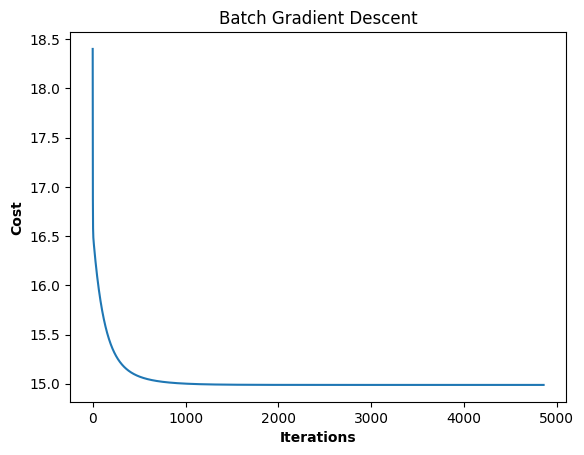

In [7]:
plt.plot([i for i in range(len(y))], y)
plt.xlabel('Iterations', fontweight ='bold')
plt.ylabel('Cost', fontweight ='bold')
plt.title('Batch Gradient Descent')
plt.savefig('hw2.4.a.png', transparent=False)
plt.show()

In [8]:
print('Cost for training data:', model._cost(df))

Cost for training data: 14.987817986249805


In [9]:
print('Cost for test data:', model._cost(df_test))

Cost for test data: 23.361005665475126
